# NLOS/LOS Classifcation

In this notebook, we produce simple classfiers to determine whether we can distinguish between line of sight / non-line of sight GNSS observations using signal characteristics. We firstly import the dataset into a Pandas DataFrame before further processing.


In [38]:
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
df = pd.read_csv('observations2020-03-04.csv')
df.head()

,EpochID,Svid,BiasUncertaintyNanos,State,ReceivedSvTimeNanos,ReceivedSvTimeUncertaintyNanos,Cn0DbHz,PseudorangeRateMetersPerSecond,ReceiverGPSTimeNanos,TransmitterGPSTimeNanos,...,azimuth,ionosphereDelay,troposphereDelay,intersectingPoints,Z,W,X,Y,PseudoRange,Residual
0,1,E02,23.770348,85026.0,2.045859e+14,6.900000e+01,23.471855,441.508879,1.265446e+18,NaN,...,32.355947,NaN,NaN,"c(X = 529503.502602816, Y = 182302.928725026, ...",34.681819,275.614545,529502.042041,182300.623332,NaN,NaN
1,1,E07,23.770348,21546.0,2.045859e+14,1.100000e+01,45.905182,297.262449,1.265446e+18,NaN,...,103.149008,NaN,NaN,"c(X = 529581.919082558, Y = 182281.963325678, ...",142.241196,436.252140,529502.042041,182300.623332,NaN,NaN
2,1,E08,23.770348,84002.0,2.045859e+14,1.000000e+09,24.197746,491.962844,1.265446e+18,NaN,...,105.951171,NaN,NaN,"c(X = 529570.16004556, Y = 182281.153618431, Z...",39.700078,454.577197,529502.042041,182300.623332,NaN,NaN
3,1,E11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-9.569995,NaN,NaN,"c(X = 529501.856474795, Y = 182301.723970592, ...",33.934377,273.574427,529502.042041,182300.623332,NaN,NaN
4,1,E12,23.770348,84002.0,2.045859e+14,1.000000e+09,22.291088,47.024307,1.265446e+18,NaN,...,-57.767736,NaN,NaN,"c(X = 529501.141208282, Y = 182301.191325316, ...",34.318255,272.682622,529502.042041,182300.623332,NaN,NaN


In [53]:
df.loc[:, ['PseudoRange' , 'SatDistance']]

,PseudoRange,SatDistance
0,NaN,2.737755e+07
1,NaN,2.434706e+07
2,NaN,2.866219e+07
3,NaN,2.868801e+07
4,NaN,2.669391e+07
5,NaN,2.643829e+07
6,NaN,2.908383e+07
7,NaN,2.904456e+07
8,NaN,2.544400e+07
9,NaN,2.468426e+07


In [51]:
df.columns

Index(['EpochID', 'Svid', 'BiasUncertaintyNanos', 'State',
       'ReceivedSvTimeNanos', 'ReceivedSvTimeUncertaintyNanos', 'Cn0DbHz',
       'PseudorangeRateMetersPerSecond', 'ReceiverGPSTimeNanos',
       'TransmitterGPSTimeNanos', 'time', 'clockError', 'Rx', 'Ry', 'Rz', 'Vx',
       'Vy', 'Vz', 'relativisticClockError', 'rotation', 'velocity',
       'geometry', 'SatDistance', 'UTCTime', 'elevation', 'azimuth',
       'ionosphereDelay', 'troposphereDelay', 'intersectingPoints', 'Z', 'W',
       'X', 'Y', 'PseudoRange', 'Residual'],
      dtype='object')

# EDA

Each signal in the dataset belongs to an epoch (a group of observations) and is identified by satellite id (SVID). The labels were produced through a geometric analysis of a ground truth 3D map of UCL (plotting the signal trajectories and identifying whether the signal passes through a building or not). In this notebook we primarily focus on two of the features in the dataset:

1) The Received SV time Nanos - the time in nanoseconds that it took the satellite transmission to reach the receiver. 

2) The signal strength -  Carrier to Noise ratio in DecibelHertz.

We firstly begin by visualising the distribution of the two features under consideration, and also the balance of the labels. We can also see the number of observations present in each epoch.

In [229]:
df.shape

(245866, 10)

In [282]:
# Totol number of epochs
len(df['EpochID'].unique())

6487

In [232]:
#  Epochs with the most observations
df['EpochID'].value_counts().head()

9843    41
9865    41
9156    41
9138    41
9823    41
Name: EpochID, dtype: int64

In [283]:
#  Epochs with the fewest observations
df['EpochID'].value_counts().tail()

7893    36
4789    36
4423    36
7818    36
6635    36
Name: EpochID, dtype: int64

In [4]:
#  Count the labels
df['Label'].value_counts(dropna=False)

NLOS    164918
LOS      71195
NaN       9753
Name: Label, dtype: int64

In [5]:
df = df.dropna(subset=['Label'])

In [9]:
# Convert the string labels to booleans
def transf_labels(l1):
    if l1 == 'NLOS':
        return 0
    else:
        return 1
# df['Label'] = df['Label'].apply(transf_labels)

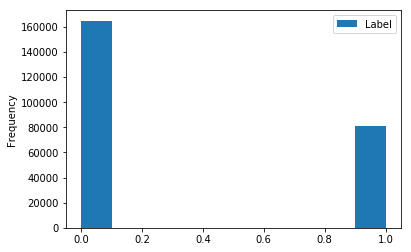

In [237]:
# Label balance plot
df['Label'].plot(kind='hist')
plt.legend()
plt.show()

In [6]:
df = df.loc[:,['Cn0DbHz', 'Residual', 'Label']]
# drop the columns with no label
df = df.dropna()

In [225]:
df.shape

(236113, 4)

In [15]:
df.head()

,Cn0DbHz,PseudoRange,Label
0,23.471855,NaN,NLOS
1,45.905182,NaN,LOS
2,24.197746,NaN,NLOS
3,NaN,NaN,NLOS
4,22.291088,NaN,NLOS


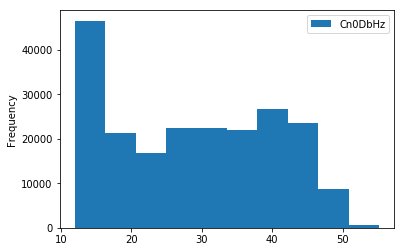

In [223]:
# Histogram of the signal strength
df['Cn0DbHz'].plot(x='Cn0DbHz', kind='hist')
plt.legend()
plt.show()

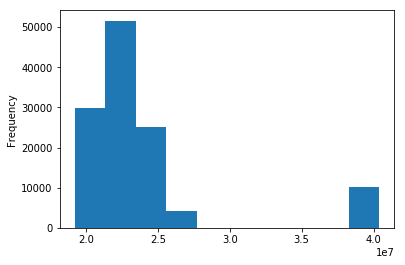

In [16]:
df['PseudoRange'].plot(kind='hist')

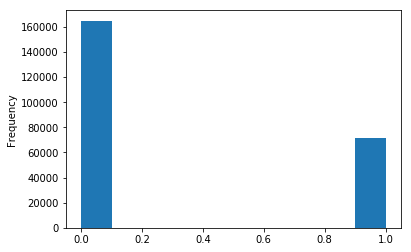

In [10]:
df['Label'].plot(kind='hist')

In [286]:
df['Label'].value_counts()

0    164918
1     71195
Name: Label, dtype: int64

# Modelling

Initially we will use only the signal strength as a feature for the non/line-of-sight binary classification. We will evaluate Logistic Regression, SVMs and some boosting models (AdaBoost). We will firstly drop all the NaN entries in the signal strength, and then compare the performance when NaNs are replaced by zeros.

In [7]:
df_only_signal = df.loc[:,['Cn0DbHz','Label']]

In [10]:
df_only_signal['Label'] = df_only_signal['Label'].apply(transf_labels)

In [11]:
df_only_signal['Label'].value_counts()

0    69688
1    51452
Name: Label, dtype: int64

In [19]:
# df_only_signal = df_only_signal.dropna()
df_only_signal = df_only_signal.fillna(0)

In [12]:
X =  df_only_signal['Cn0DbHz'].values.tolist()
y =  df_only_signal['Label'].values.tolist()

In [13]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)
X_train_6, X_test_6, y_train_6, y_test_6 = train_test_split(X, y, test_size=0.6, random_state=42)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
X_train = np.array(X_train).reshape(-1, 1)
X_train_6 = np.array(X_train_6).reshape(-1, 1)
X_train_2 = np.array(X_train_2).reshape(-1, 1)

In [15]:
from sklearn.linear_model import LogisticRegression
clf = clf_6 = clf_2 = LogisticRegression()
clf = clf.fit(X_train, y_train)
clf_6 = clf_6.fit(X_train_6, y_train_6)
clf_2 = clf_2.fit(X_train_2, y_train_2)

/Users/nishitbiswas/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nishitbiswas/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nishitbiswas/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [16]:
preds_LR = clf.predict(np.array(X_test).reshape(-1, 1))
y_score_LR = clf.predict_proba(np.array(X_test).reshape(-1, 1))
preds_LR_6 = clf_6.predict(np.array(X_test_6).reshape(-1, 1))
y_score_LR_6 = clf_6.predict_proba(np.array(X_test_6).reshape(-1, 1))
preds_LR_2 = clf_2.predict(np.array(X_test_2).reshape(-1, 1))
y_score_LR_2 = clf_2.predict_proba(np.array(X_test_2).reshape(-1, 1))

In [17]:
y_score_LR = y_score_LR[:, 1]
y_score_LR = [x for x in y_score_LR]
y_score_LR_6 = y_score_LR_6[:, 1]
y_score_LR_6 = [x for x in y_score_LR_6]
y_score_LR_2 = y_score_LR_2[:, 1]
y_score_LR_2 = [x for x in y_score_LR_2]

In [18]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr_LR, tpr_LR, thresholds = roc_curve(y_test, y_score_LR)
fpr_LR_6, tpr_LR_6, thresholds = roc_curve(y_test_6, y_score_LR_6)
fpr_LR_2, tpr_LR_2, thresholds = roc_curve(y_test_2, y_score_LR_2)

In [19]:
auc = roc_auc_score(y_test, y_score_LR)
print('AUC: %.3f' % auc)
auc_6 = roc_auc_score(y_test_6, y_score_LR_6)
print('0.6 AUC: %.3f' % auc_6)
auc_2 = roc_auc_score(y_test_2, y_score_LR_2)
print('0.2 AUC: %.3f' % auc_2)

AUC: 0.878
0.6 AUC: 0.878
0.2 AUC: 0.876


In [20]:
preds_LR = list(preds_LR)
score = 0
for x1 in range(len(preds_LR)):
    if preds_LR[x1] == y_test[x1]:
        score+= 1
print(score)
    

78866


In [21]:
score/len(preds_LR)

0.8137898299488195

## SVM

In [22]:
from sklearn.svm import SVC
clf = clf_6 = clf_2 = SVC(gamma='auto',probability=True)
clf = clf.fit(X_train, y_train)
# clf_6 = clf_6.fit(X_train_6, y_train_6)
# clf_2 = clf_2.fit(X_train_2, y_train_2)

In [23]:
preds_svm = clf.predict(np.array(X_test).reshape(-1, 1))
y_score_svm = clf.predict_proba(np.array(X_test).reshape(-1, 1))
y_score_svm = y_score_svm[:, 1]
y_score_svm = [x for x in y_score_svm]
# preds_svm_6 = clf.predict(np.array(X_test_6).reshape(-1, 1))
# y_score_svm_6 = clf.predict_proba(np.array(X_test_6).reshape(-1, 1))
# y_score_svm_6 = y_score_svm_6[:, 1]
# y_score_svm_6 = [x for x in y_score_svm_6]
# preds_svm_2 = clf.predict(np.array(X_test_2).reshape(-1, 1))
# y_score_svm_2 = clf.predict_proba(np.array(X_test_2).reshape(-1, 1))
# y_score_svm_2 = y_score_svm_2[:, 1]
# y_score_svm_2 = [x for x in y_score_svm_2]

In [24]:
fpr_svm, tpr_svm, thresholds = roc_curve(y_test, y_score_svm)
auc = roc_auc_score(y_test, y_score_svm)
print('AUC: %.3f' % auc)
# auc_6 = roc_auc_score(y_test_6, y_score_svm_6)
# print('0.6 AUC: %.3f' % auc_6)
# auc_2 = roc_auc_score(y_test_2, y_score_svm_2)
# print('0.2 AUC: %.3f' % auc_2)

AUC: 0.832


In [25]:
preds_svm = list(preds_svm)
score = 0
for x1 in range(len(preds_svm)):
    if preds_svm[x1] == y_test[x1]:
        score+= 1
print(score)

79024


In [26]:
score/len(preds_svm)

0.8154201750041274

In [44]:
# ADABoost
from sklearn.ensemble import AdaBoostClassifier
clf = clf_6 = clf_2 = AdaBoostClassifier(n_estimators=200, random_state=0)
clf.fit(X_train, y_train)
clf = clf.fit(X_train, y_train)
clf_6 = clf_6.fit(X_train_6, y_train_6)
clf_2 = clf_2.fit(X_train_2, y_train_2)

In [45]:
clf

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=200, random_state=0)

In [46]:
preds_AB = clf.predict(np.array(X_test).reshape(-1, 1))
y_score_AB = clf.predict_proba(np.array(X_test).reshape(-1, 1))
y_score_AB = y_score_AB[:, 1]
y_score_AB = [x for x in y_score_AB]
preds_AB_6 = clf.predict(np.array(X_test_6).reshape(-1, 1))
y_score_AB_6 = clf.predict_proba(np.array(X_test_6).reshape(-1, 1))
y_score_AB_6 = y_score_AB_6[:, 1]
y_score_AB_6 = [x for x in y_score_AB_6]
preds_AB_2 = clf.predict(np.array(X_test_2).reshape(-1, 1))
y_score_AB_2 = clf.predict_proba(np.array(X_test_2).reshape(-1, 1))
y_score_AB_2 = y_score_AB_2[:, 1]
y_score_AB_2 = [x for x in y_score_AB_2]

In [47]:
fpr_AB, tpr_AB, thresholds = roc_curve(y_test, y_score_AB)
auc = roc_auc_score(y_test, y_score_AB)
print('0.8 AUC: %.3f' % auc)
fpr_AB_6, tpr_AB_6, thresholds = roc_curve(y_test_6, y_score_AB_6)
auc_6 = roc_auc_score(y_test_6, y_score_AB_6)
print('0.6 AUC: %.3f' % auc_6)
fpr_AB_2, tpr_AB_2, thresholds = roc_curve(y_test_2, y_score_AB_2)
auc_2 = roc_auc_score(y_test_2, y_score_AB_2)
print('0.2 AUC: %.3f' % auc_2)

0.8 AUC: 0.880
0.6 AUC: 0.880
0.2 AUC: 0.877


In [49]:
preds_AB = list(preds_AB)
score = 0
for x1 in range(len(preds_AB)):
    if preds_AB[x1] == y_test[x1]:
        score+= 1
print(score)
print(score/len(preds_AB))

79054
0.8157297341918441


The graphs below shows the ROC and PR performance for the three models when we drop NaN values for the signal strength. The same analysis was performed by replacing NaNs with zeros. By using zeros, there is a drop in the AUCs for the LogisticRegression model, however the performance of the other two model hold. Going forward we drop NaNs for all features, especially as the signal strength is the dominant feature for classification in this setting [give link to literature paper]. We can also see that by using only 20% of the dataset for training, we can still produce results comparable to using 80% of the dataset.

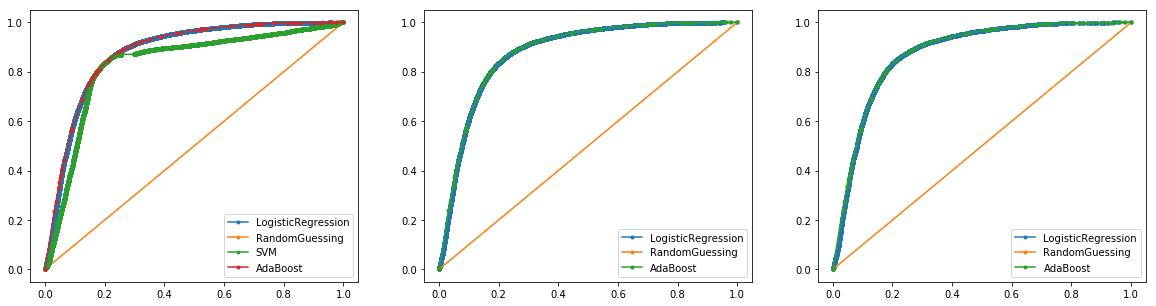

In [31]:
# ROC plots

# 80% training data plots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
ns_probs = [0 for _ in range(len(y_test))]
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
axes[0].plot(fpr_LR, tpr_LR, marker='.', label='LogisticRegression')
axes[0].plot(ns_fpr, ns_tpr, marker='.', label='RandomGuessing')
axes[0].plot(fpr_svm, tpr_svm, marker='.', label='SVM')
axes[0].plot(fpr_AB, tpr_AB, marker='.', label='AdaBoost')
axes[0].legend()

# 60% training data plots
axes[1].plot(fpr_LR_6, tpr_LR_6, marker='.', label='LogisticRegression')
axes[1].plot(ns_fpr, ns_tpr, marker='.', label='RandomGuessing')
axes[1].plot(fpr_AB_6, tpr_AB_6, marker='.', label='AdaBoost')
axes[1].legend()

# 20% training data plots
axes[2].plot(fpr_LR_2, tpr_LR_2, marker='.', label='LogisticRegression')
axes[2].plot(ns_fpr, ns_tpr, marker='.', label='RandomGuessing')
axes[2].plot(fpr_AB_2, tpr_AB_2, marker='.', label='AdaBoost')
axes[2].legend()

# The graphs show the test ROC curves for 80, 60 and 20% of the total data used for training respectively.

0.8 PR AUC: 0.764
0.8 PR AUC: 0.790
0.8 PR AUC: 0.784


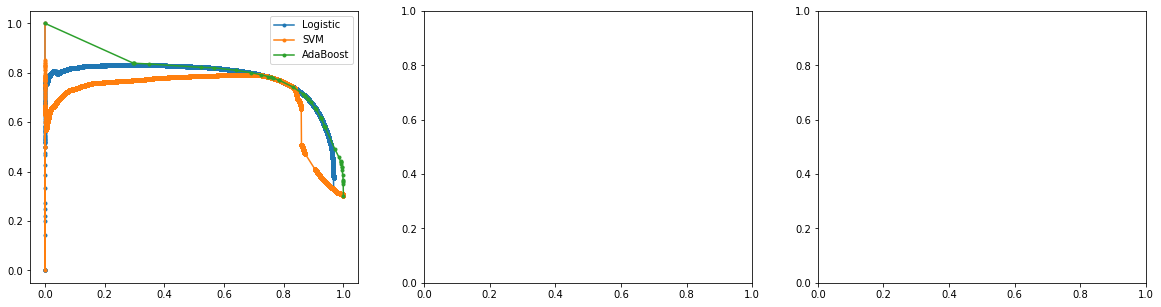

In [60]:
# PR plots for the same classifiers
from sklearn.metrics import precision_recall_curve, recall_score
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

# 80% plots
lr_precision, lr_recall, _ = precision_recall_curve(y_test, y_score_LR)
svm_precision, svm_recall, _ = precision_recall_curve(y_test, y_score_svm)
AB_precision, AB_recall, _ = precision_recall_curve(y_test, y_score_AB)
auc_lr = recall_score(y_test, preds_LR)
auc_svm = recall_score(y_test, preds_svm)
auc_AB = recall_score(y_test, preds_AB)
print('0.8 PR AUC: %.3f' % auc_lr)
print('0.8 PR AUC: %.3f' % auc_svm)
print('0.8 PR AUC: %.3f' % auc_AB)
axes[0].plot(lr_recall, lr_precision, marker='.', label='Logistic')
axes[0].plot(svm_recall, svm_precision, marker='.', label='SVM')
axes[0].plot(AB_recall, AB_precision, marker='.', label='AdaBoost')
axes[0].legend()

# # 60% plots
# # precision_LR_6, recall_LR_6, _ = precision_recall_curve(y_test, y_score_LR_6)
# AB_precision_6, AB_recall_6, _ = precision_recall_curve(y_test, y_score_AB_6)
# # auc_lr_6 = recall_score(y_test, preds_LR_6)
# auc_AB_6 = recall_score(y_test, preds_AB_6)
# # print('0.6 PR AUC: %.3f' % auc_lr)
# print('0.6 PR AUC: %.3f' % auc_AB)
# # axes[1].plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axes[1].plot(AB_recall, AB_precision, marker='.', label='AdaBoost')
# axes[1].legend()

# # 20% plots
# precision_LR_2, recall_LR_2, _ = precision_recall_curve(y_test, y_score_LR_2)
# AB_precision_2, AB_recall_2, _ = precision_recall_curve(y_test, y_score_AB_2)
# auc_lr_2 = recall_score(y_test, preds_LR_2)
# auc_AB_2 = recall_score(y_test, preds_AB_2)
# print('0.2 PR AUC: %.3f' % auc_lr_2)
# print('0.2 PR AUC: %.3f' % auc_AB_2)
# axes[2].plot(lr_recall_2, lr_precision_2, marker='.', label='Logistic')
# axes[2].plot(AB_recall_2, AB_precision_2, marker='.', label='AdaBoost')
# axes[2].legend()


## Inclusion of the SV time

In [58]:
df_2_features  = df.loc[:,['Cn0DbHz','Residual', 'Label']]

In [59]:
df_2_features = df_2_features.dropna()

In [60]:
df_2_features['Residual'].value_counts(dropna=False)

 47.999996     1
-13.305800     1
 74.443966     1
-53.507524     1
 53.097248     1
-106.444701    1
 37.222524     1
 14.521721     1
-26.548890     1
-13.274480     1
-86.395976     1
-74.446218     1
-37.223063     1
 37.098198     1
-12.873742     1
 53.096711     1
 2.318648      1
-37.223482     1
 53.098462     1
 31.308125     1
-4.637351      1
-37.098874     1
 26.611996     1
 53.224030     1
 9.274794      1
-69.735077     1
-8.507346      1
 18.310483     1
-56.522024     1
 13.274157     1
              ..
-21.140779     1
-49.397725     1
-84.372784     1
 5.308586      1
 21.236378     1
 169.609940    1
 6.834768      1
-21.236167     1
-116.806284    1
 84.943380     1
 75.527028     1
 21.235749     1
-21.201784     1
-65.851351     1
 6.224061      1
 10.569706     1
 10.601029     1
-21.202145     1
-29.202354     1
-67.585880     1
-58.404908     1
-2.650314      1
 42.001666     1
-59.095950     1
-29.202717     1
 10.617355     1
-21.202822     1
-21.725317    

In [30]:
df_2_features = df_2_features.reset_index()

In [62]:
def transf_labels(l1):
    if l1 == 'NLOS':
        return 0
    else:
        return 1

In [63]:
df_2_features['Label'] = df_2_features['Label'].apply(transf_labels)

In [66]:
X =  df_2_features.loc[:,['Cn0DbHz','Residual']].values.tolist()
y =  df_2_features['Label'].values.tolist()

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)

In [68]:
df_2_features.dtypes

Cn0DbHz     float64
Residual    float64
Label         int64
dtype: object

In [69]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf = clf.fit(X_train, y_train)

/Users/nishitbiswas/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [70]:
preds = clf.predict(X_test)

In [71]:
preds = list(preds)
score = 0
for x1 in range(len(preds)):
    if preds[x1] == y_test[x1]:
        score+= 1
print(score)
    

89052


In [72]:
score/len(preds)

0.8167959936162016

In [36]:
from sklearn.ensemble import AdaBoostClassifier

In [37]:
from sklearn.ensemble import AdaBoostClassifier
clf = clf_6 = clf_2 = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=100, random_state=0)

In [38]:
ada_preds = clf.predict(np.array(X_test).reshape(-1, 1))

In [39]:
ada_preds = list(ada_preds)
score = 0
for x1 in range(len(ada_preds)):
    if ada_preds[x1] == y_test[x1]:
        score+= 1
print(score)
    

78903


In [77]:
score/len(preds)

0.8155761011134959

In [32]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=200, learning_rate=1.0,
                                 max_depth=1, random_state=0).fit(X_train, y_train)

In [34]:
gb_preds = clf.predict(np.array(X_test).reshape(-1, 1))
y_score_gb = clf.predict_proba(np.array(X_test).reshape(-1, 1))
y_score_AB = y_score_AB[:, 1]
y_score_AB = [x for x in y_score_AB]

In [ ]:
preds_AB = clf.predict(np.array(X_test).reshape(-1, 1))
y_score_AB = clf.predict_proba(np.array(X_test).reshape(-1, 1))
y_score_AB = y_score_AB[:, 1]
y_score_AB = [x for x in y_score_AB]

In [35]:
gb_preds = list(gb_preds)
score = 0
for x1 in range(len(gb_preds)):
    if gb_preds[x1] == y_test[x1]:
        score+= 1
print(score)
print(score/len(gb_preds))

78879
0.8139239722634968
